<a href="https://colab.research.google.com/github/Iksora03/Deep-Learning/blob/master/ResNeXt-50_Cocoa%20Beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14.0
!pip install git+https://github.com/keras-team/keras-applications/
!pip install keras==2.2.4

     |████████████████████████████████| 109.2MB 30kB/s 
     |████████████████████████████████| 491kB 54.0MB/s 
     |████████████████████████████████| 3.2MB 70.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Cloning https://github.com/keras-team/keras-applications/ to /tmp/pip-req-build-bu0nnoa5
  Running command git clone -q https://github.com/keras-team/keras-applications/ /tmp/pip-req-build-bu0nnoa5
  Created wheel for Keras-Applications: filename=Keras_Applications-1.0.8-cp36-none-any.whl size=62000 sha256=57d3c599b59cfe30fe64ae320e9a5632098dfc9351ffc99bcaeb611e368d78bc
  Stored in directory: /tmp/pip

In [0]:
import tensorflow as tf; print(tf.__version__)
import keras; print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pickle
import cv2
import keras
from os import listdir
from keras import backend as K
from keras.layers import Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [0]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224, 224))
image_size = 0
directory_root = "/content/drive/My Drive/Dataset Coklat/"
width=224
height=224
depth=3

In [0]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [0]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    %time print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Unfermented_Cocoa ...
[INFO] Processing Broken_Beans_Cocoa ...
[INFO] Processing Whole_Beans_Cocoa ...
[INFO] Processing Moldy_Cocoa ...
[INFO] Processing Fermented_Cocoa ...
[INFO] Processing Bean_Fraction_Cocoa ...
[INFO] Image loading completed
CPU times: user 502 µs, sys: 0 ns, total: 502 µs
Wall time: 412 µs


In [0]:
%%time
image_size = len(image_list)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.3, random_state = 42)
print(image_size)
print(label_binarizer.classes_)

614
['Bean_Fraction_Cocoa' 'Broken_Beans_Cocoa' 'Fermented_Cocoa'
 'Moldy_Cocoa' 'Unfermented_Cocoa' 'Whole_Beans_Cocoa']
CPU times: user 1.94 s, sys: 36.1 ms, total: 1.98 s
Wall time: 1.98 s


In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
%%time
from keras import models
from keras import layers
from keras_applications.resnext import ResNeXt50
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

conv_base = ResNeXt50(weights='imagenet',
                  backend=keras.backend,
                  layers=keras.layers,
                  models=keras.models,
                  include_top=False,
                  utils=keras.utils,
                  input_shape=((224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),
              metrics=["acc"])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnext50 (Model)            (None, 7, 7, 2048)        23048128  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 48,738,753
Trainable params: 48,670,529
Non-trainable params: 68,224
_________________________________________________________________
CPU times: user 19.3 s, sys: 461 ms, total: 19.8 s
Wall time: 19.6 s


In [0]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1)

Epoch 1/50
1/1 [==============================] - 68s 68s/step - loss: 0.9360 - acc: 0.3616 - val_loss: 2.3026 - val_acc: 0.8571
Epoch 2/50
1/1 [==============================] - 50s 50s/step - loss: 2.2757 - acc: 0.8571 - val_loss: 4.2938 - val_acc: 0.7321
Epoch 3/50
1/1 [==============================] - 54s 54s/step - loss: 3.8644 - acc: 0.7589 - val_loss: 4.2938 - val_acc: 0.7321
Epoch 4/50
1/1 [==============================] - 49s 49s/step - loss: 3.9483 - acc: 0.7537 - val_loss: 4.2938 - val_acc: 0.7321
Epoch 5/50
1/1 [==============================] - 55s 55s/step - loss: 4.0076 - acc: 0.7500 - val_loss: 4.2938 - val_acc: 0.7321
Epoch 6/50
1/1 [==============================] - 51s 51s/step - loss: 3.7904 - acc: 0.7635 - val_loss: 4.2938 - val_acc: 0.7321
Epoch 7/50
1/1 [==============================] - 56s 56s/step - loss: 4.0076 - acc: 0.7500 - val_loss: 4.2938 - val_acc: 0.7321
Epoch 8/50
1/1 [==============================] - 51s 51s/step - loss: 3.7904 - acc: 0.7635 - val

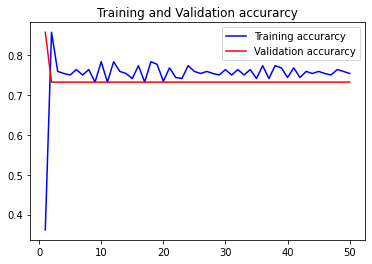

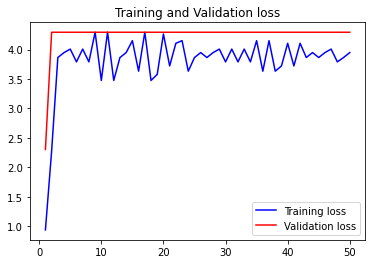

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:
%%time
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 84s 84s/step - loss: 0.9088 - acc: 0.5089 - val_loss: 1.8620 - val_acc: 0.8571
Epoch 2/100
1/1 [==============================] - 48s 48s/step - loss: 1.9635 - acc: 0.8571 - val_loss: 3.1488 - val_acc: 0.8036
Epoch 3/100
1/1 [==============================] - 51s 51s/step - loss: 3.2919 - acc: 0.7946 - val_loss: 3.1488 - val_acc: 0.8036
Epoch 4/100
1/1 [==============================] - 47s 47s/step - loss: 3.1587 - acc: 0.8030 - val_loss: 3.1488 - val_acc: 0.8036
Epoch 5/100
1/1 [==============================] - 51s 51s/step - loss: 3.1488 - acc: 0.8036 - val_loss: 3.1488 - val_acc: 0.8036
Epoch 6/100
1/1 [==============================] - 46s 46s/step - loss: 3.3166 - acc: 0.7931 - val_loss: 3.1488 - val_acc: 0.8036
Epoch 7/100
1/1 [==============================] - 50s 50s/step - loss: 3.2919 - acc: 0.7946 - val_loss: 3.1488 - val_acc: 0.8036
Epoch 8/100
1/1 [==============================] - 45s 45s/step - loss: 3.1587 - acc: 0.80

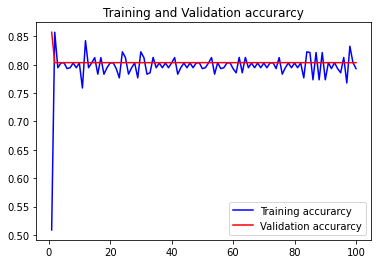

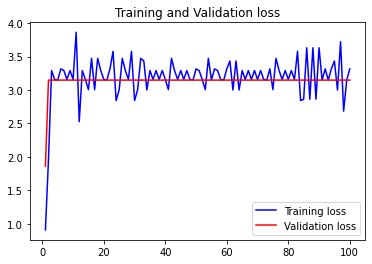

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()